### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

### Importing Dataset and performing feature scaling

In [4]:
data = pd.read_csv('threats.csv')
data = data.dropna(subset=[data.columns[-1]]) # clearing the rows with NaN values
X, y = data.drop('Threat', axis=1).values, data.Threat.values # initialising X and y variables
X = X.astype(int)
y = y.astype(int)

# feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

<class 'numpy.ndarray'>


### Implementing RFE to remove weakest features

In [5]:
estimator = DecisionTreeClassifier()
rfe = RFE(estimator=estimator, n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)

### Balancing dataset by oversampling minority feature to prevent oversampling

In [6]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_rfe, y)

### Splitting data into test and train sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=0)

### Visualising the model as a tree

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(tree.export_text(clf))

|--- feature_0 <= 0.06
|   |--- feature_0 <= -0.33
|   |   |--- feature_0 <= -0.33
|   |   |   |--- feature_0 <= -0.72
|   |   |   |   |--- feature_0 <= -0.72
|   |   |   |   |   |--- feature_0 <= -1.10
|   |   |   |   |   |   |--- feature_0 <= -1.10
|   |   |   |   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.88
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 36
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  -1.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |   |   |   |   |   |--- feature_0 >  -1.88
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.49
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.98
|   

### Getting Feature importance

In [28]:
imp = clf.feature_importances_
for i, j in enumerate(imp):
    match i: # switch case implementation to make the output grammatically correct
        case 1:
            print(f'Score for {i}st Feature: %.5f' % j)
        case 2:
            print(f'Score for {i}nd Feature: %.5f' % j)
        case 3:
            print(f'Score for {i}rd Feature: %.5f' % j)
        case _:
            print(f'Score for {i}th Feature: %.5f' % j)   


Score for 0th Feature: 0.52479
Score for 1st Feature: 0.12631
Score for 2nd Feature: 0.06132
Score for 3rd Feature: 0.03795
Score for 4th Feature: 0.03436
Score for 5th Feature: 0.02887
Score for 6th Feature: 0.03520
Score for 7th Feature: 0.02284
Score for 8th Feature: 0.02365
Score for 9th Feature: 0.01938
Score for 10th Feature: 0.02250
Score for 11th Feature: 0.01403
Score for 12th Feature: 0.02221
Score for 13th Feature: 0.01700
Score for 14th Feature: 0.00958


### Visualising the Data trees using Matplotlib

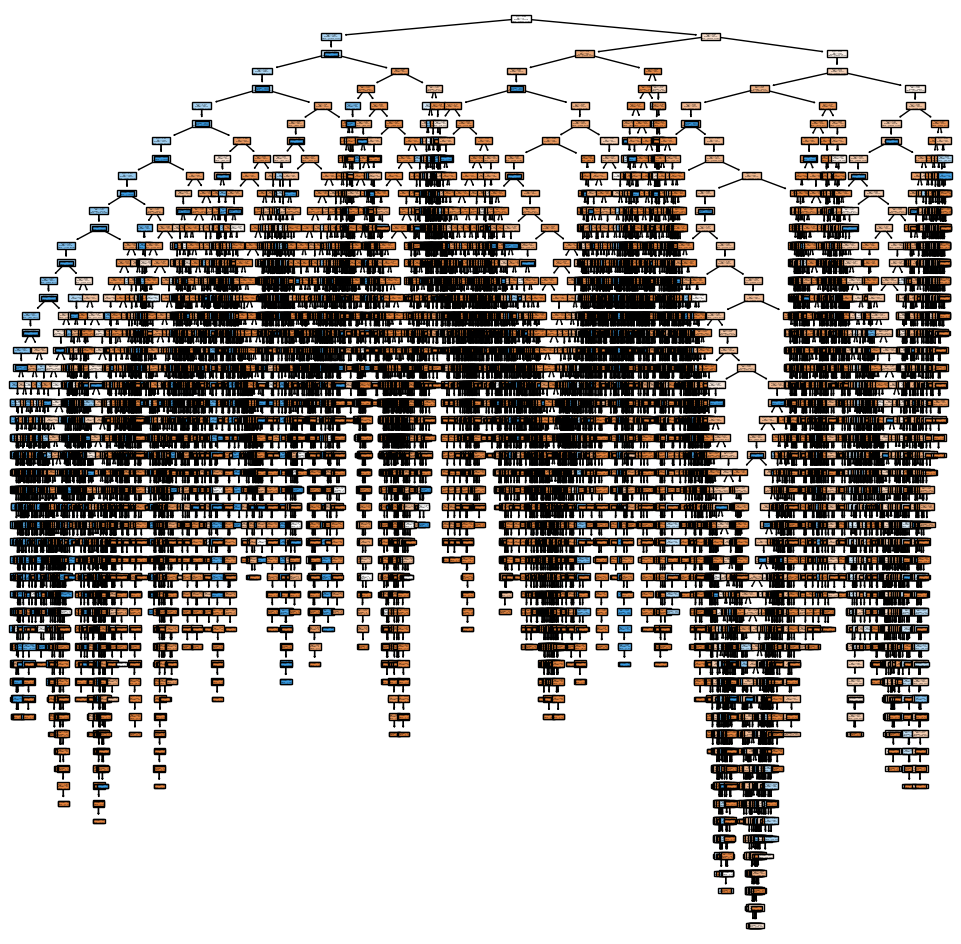

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
_ = tree.plot_tree(clf, ax=ax, filled=True)

### Making Predictions using the classifier

In [16]:
predictions = clf.predict(X_test)

### Calculating AUC Accuracy of the model

In [17]:
print(f'The AUC accuracy of the model is {round(roc_auc_score(y_test, predictions) * 100, 3)}%')


The AUC accuracy of the model is 94.786%


### Obtaining F1 score with different average metrics using "classification_report" function of scikit-learn 


In [21]:
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9221    0.9785    0.9495    249735
           1     0.9771    0.9172    0.9462    249311

    accuracy                         0.9479    499046
   macro avg     0.9496    0.9479    0.9478    499046
weighted avg     0.9496    0.9479    0.9478    499046



### Performing cross-validation

In [27]:
scores = cross_val_score(clf, X_smote, y_smote, cv=5) # 5-fold cross-validation
print(f'{round(scores.mean(), 2) * 100}% accuracy with a standard deviation of {round(scores.std(), 3)}')

95.0% accuracy with a standard deviation of 0.001
